<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SETUP

In [14]:
#import os
#import tensorflow as tf
#import numpy as np
#import random as rn

#os.environ['PYTHONHASHSEED'] = '0'
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
#np.random.seed(37)
#tf.random.set_seed(89)

import numpy as np
import os
import random
import tensorflow as tf # 2.2.0

SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # TF 2.1+
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA PROCESSING

In [18]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Charts_5/Train'
validation_dir = '/content/drive/My Drive/Colab Notebooks/Charts_5/Validation'

In [19]:
img_width, img_height = 224, 224
nb_train_samples = 80
nb_validation_samples = 20
epochs = 30
batch_size = 10

In [20]:
#checking whether the rgb channel is first or last to feed the input shape accordingly
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [21]:
#Performing augmentation on image scaling, zoom and fliiping the images horizontally so that the network has more training samples
train_datagen = ImageDataGenerator( 
	rescale=1. / 255, 
	shear_range=0.2, 
	zoom_range=0.2, 
	horizontal_flip=True) 

#Not having any augmentation apart from scaling as the validation data should resemble the real-world data as close as possible
val_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='categorical') 

validation_generator = val_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='categorical')

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [22]:
# 3 CNN blocks containing a max pooling layer in each of them. On top of that is a fully connected layer with relu activation function
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax') #Nodes in the final dense layer should be equal to number of classes + softmax activation
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [23]:
history = model.fit( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size) 

Epoch 1/30
8/8 [==============================] - 6s 750ms/step - loss: 4.6549 - accuracy: 0.1875 - val_loss: 1.5450 - val_accuracy: 0.3000
Epoch 2/30
8/8 [==============================] - 6s 740ms/step - loss: 1.5727 - accuracy: 0.3500 - val_loss: 1.6485 - val_accuracy: 0.2000
Epoch 3/30
8/8 [==============================] - 6s 726ms/step - loss: 1.5436 - accuracy: 0.3125 - val_loss: 1.4124 - val_accuracy: 0.7000
Epoch 4/30
8/8 [==============================] - 6s 717ms/step - loss: 1.3289 - accuracy: 0.4125 - val_loss: 1.4397 - val_accuracy: 0.4500
Epoch 5/30
8/8 [==============================] - 6s 731ms/step - loss: 1.3510 - accuracy: 0.4125 - val_loss: 0.9835 - val_accuracy: 0.6500
Epoch 6/30
8/8 [==============================] - 6s 736ms/step - loss: 1.0977 - accuracy: 0.5375 - val_loss: 1.0090 - val_accuracy: 0.5000
Epoch 7/30
8/8 [==============================] - 6s 728ms/step - loss: 0.9521 - accuracy: 0.5250 - val_loss: 1.0340 - val_accuracy: 0.5500
Epoch 8/30
8/8 [====

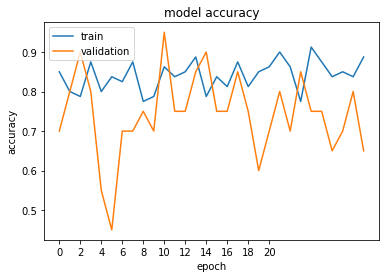

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xticks(np.arange(0,21, 2))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()